# Keras 手写数字识别项目

视频播放地址：

手写数字识别项目--项目介绍：https://www.bilibili.com/video/BV1d54y167CG/

书写数字识别项目--代码实现：https://www.bilibili.com/video/BV1Jr4y1w7Cj/?spm_id_from=333.788.videocard.1

书写数字识别项目--补充计算参数：https://www.bilibili.com/video/BV1iy4y1B7j6/?spm_id_from=333.788.videocard.0

## 数据集导入
EDA简单探索数据的维度，以及标记样本的分布

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
# mnist.load_data?
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 查看训练数据和测试的shape

print_shape = lambda x: print(x.shape)

print_shape(x_train)
print_shape(y_train)
print_shape(x_test)
print_shape(y_test)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


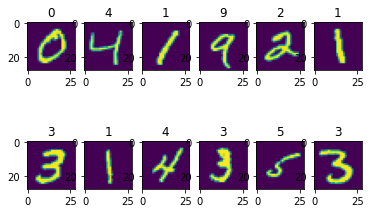

In [4]:
# 1x28x28 的图片
# 可视化部分数据集
import matplotlib.pyplot as plt
row = 6
col = 2
for i in range(1, row * col + 1):
    plt.subplot(col, row, i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [5]:
# 查看样本的分布情况
import pandas as pd

print("训练样本分布:\n", pd.Series(y_train).value_counts())
print("测试样本分布:\n", pd.Series(y_test).value_counts())

训练样本分布:
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64
测试样本分布:
 1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64


## 构建模型
采用双层的CNN

In [6]:
from tensorflow.keras import Input, Model
from tensorflow.keras import layers as L

In [7]:
# 查看后端配置的channels
# 默认是 channels_last
!cat /Users/chan/.keras/keras.json

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}

In [8]:
# 搭建模型

class Net:
    def __init__(self):
        self.image_shape = (28, 28, 1)
        self.conv1 = L.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='relu')
        self.conv2 = L.Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='relu')
        self.pool1 = L.MaxPool2D((2,2))
        self.pool2 = L.MaxPool2D((2,2))
        self.flatten = L.Flatten()
        self.fc = L.Dense(256)
        self.softmax = L.Dense(10, activation='softmax')
        self.model:Model = None
        
    def build_model(self):
        in_ = Input(shape=self.image_shape)
        x = self.conv1(in_)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc(x)
        out = self.softmax(x)
        self.model = Model(in_, out)
        self.model.summary()

In [9]:
net = Net()
net.build_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               321152

In [11]:
#from tensorflow.keras.losses import categorical_crossentropy

net.model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
import numpy as np
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
print(x_train.shape)

(60000, 28, 28, 1)


In [13]:
net.model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_test, y_test))


# Train on 60000 samples, validate on 10000 samples
# Epoch 1/2
# 60000/60000 [==============================] - 154s 3ms/sample - loss: 0.7378 - accuracy: 0.9259 - 
# val_loss: 0.1370 - val_accuracy: 0.9562
# Epoch 2/2
# 60000/60000 [==============================] - 153s 3ms/sample - loss: 0.1190 - accuracy: 0.9661 - 
# val_loss: 0.1004 - val_accuracy: 0.9699

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.1225 - accuracy: 0.9649 - val_loss: 0.0854 - val_accuracy: 0.9749
Epoch 2/2
60000/60000 [==============================] - 353s 6ms/sample - loss: 0.0968 - accuracy: 0.9713 - val_loss: 0.0904 - val_accuracy: 0.9730


In [14]:
# 测试数据中做预测，并可视化出来
def evaluate(test_img_index):
    # test_img_index < 10000
    plt.imshow(x_test[test_img_index].reshape(28, 28))
    plt.title(np.argmax(net.model.predict(np.expand_dims(x_test[test_img_index], axis=0))))

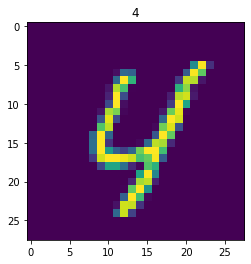

In [15]:
evaluate(555)

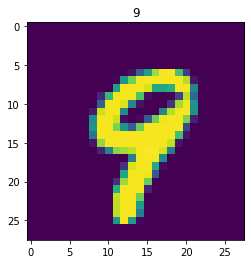

In [16]:
evaluate(6778)